## Introduction to Data Science

#### University of Redlands - DATA 101
#### Prof: Joanna Bieri [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
#### [Class Website: data101.joannabieri.com](https://joannabieri.com/data101.html)

---------------------------------------
# Homework Day 15
---------------------------------------

GOALS:

1. Practice making plots
2. Add trendlines to plots
3. Explore Linear Regression

----------------------------------------------------------

This homework has **4 questions** and **3 exercises**.


## Help with Algorithms!

Implementing algorithms can be very difficult. I would highly suggest that you **start by recreating the code that you see in the lecture**... copy and paste it and make sure it runs. THEN try to alter that code to do the exercises.

In [6]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

from itables import show

# This stops a few warning messages from showing
pd.options.mode.chained_assignment = None 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [7]:
# Load the Data
file_location = 'https://joannabieri.com/introdatascience/data/paris-paintings.csv'
DF_raw_paintings = pd.read_csv(file_location,na_filter=False)

In [8]:
DF_raw_paintings

,name,sale,lot,position,dealer,year,origin_author,origin_cat,school_pntg,diff_origin,...,peasant,othgenre,singlefig,portrait,still_life,discauth,history,allegory,pastorale,other
0,L1764-2,L1764,2,0.032787,L,1764,F,O,F,1,...,0,0,0,0,0,0,0,0,0,0
1,L1764-3,L1764,3,0.049180,L,1764,I,O,I,1,...,0,1,0,0,0,0,0,0,0,0
2,L1764-4,L1764,4,0.065574,L,1764,X,O,D/FL,1,...,0,0,0,0,0,0,0,0,0,0
3,L1764-5a,L1764,5,0.081967,L,1764,F,O,F,1,...,0,0,0,0,0,0,0,0,0,0
4,L1764-5b,L1764,5,0.081967,L,1764,F,O,F,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3388,R1764-498,R1764,498,0.992032,R,1764,F,O,F,1,...,0,0,0,0,0,0,0,0,0,0
3389,R1764-499,R1764,499,0.994024,R,1764,F,O,F,1,...,0,0,0,0,0,0,0,0,0,0
3390,R1764-500,R1764,500,0.996016,R,1764,F,O,F,1,...,0,0,0,0,0,0,0,0,0,0
3391,R1764-502a,R1764,502,1.000000,R,1764,F,O,F,1,...,0,0,1,0,0,0,0,0,0,0


In [9]:
# Make a copy of the data that we can start working on
DF = DF_raw_paintings.copy()

# Do something about all those different NaNs
DF.replace('',np.nan,inplace=True)
DF.replace('n/a',np.nan,inplace=True)
DF.replace('NaN',np.nan,inplace=True)

**Q1** Make historgrams of the height and width of all the paintings in the data set. You should be able to recreate the plots from the lecture without looking at the code.

Don't forget to change the values into floats liek we did in the lecture!

In [11]:
my_columns = ['Height_in', 'Width_in']
DF[my_columns].dtypes

Height_in    object
Width_in     object
dtype: object

In [13]:
#use lambda to update data
DF['Height_in'] = DF['Height_in'].apply(lambda x: float(x))
DF['Width_in'] = DF['Width_in'].apply(lambda x: float(x))
DF[my_columns].dtypes

Height_in    float64
Width_in     float64
dtype: object

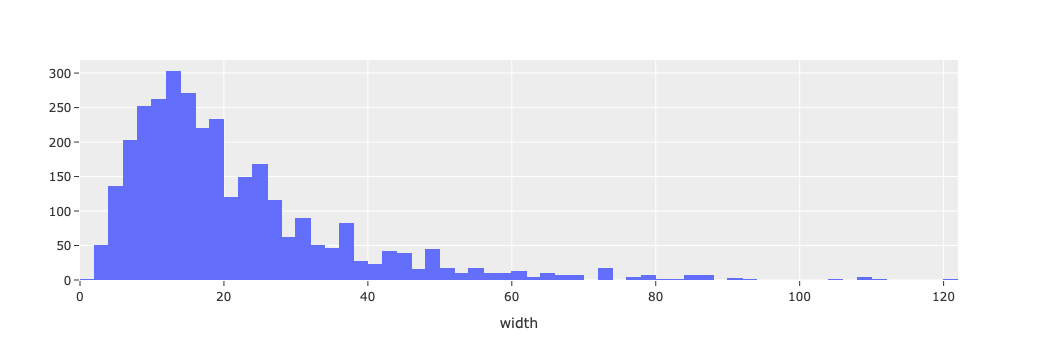

In [16]:
#Histogram of height
fig = px.histogram(DF,x='Height_in')

fig.update_layout(template="ggplot2",
                  xaxis_title="height in inches",
                  yaxis_title="")

fig.show()

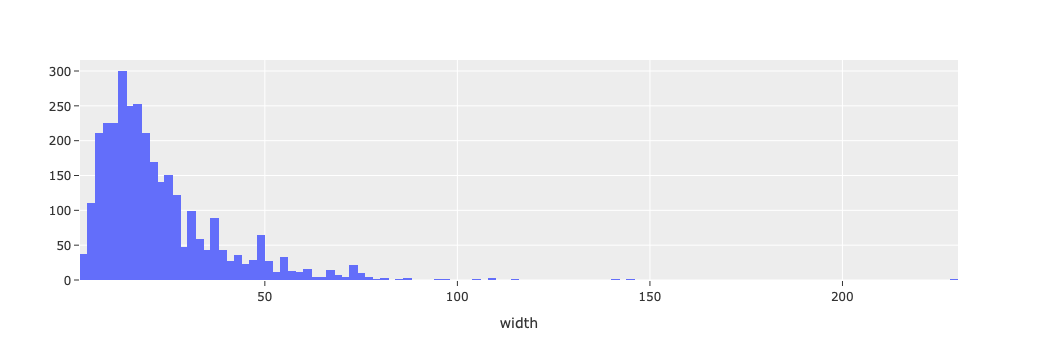

In [17]:
#Histogram of Width

fig = px.histogram(DF,x='Width_in')

fig.update_layout(template="ggplot2",
                  xaxis_title="width",
                  yaxis_title="")

fig.show()

**Q2** Explain in words what these plots tell you about the data.

The histogram of painting heights shows that most works fall within a moderate height range, indicating that painters commonly used standard canvas sizes. The frequency of paintings decreases toward both the smaller and larger ends of the scale, suggesting that extremely short or extremely tall paintings were produced far less often. Overall, the distribution shows a clear concentration around typical heights rather than being evenly spread out. If we look at the histogram of painting widths reveals that the majority of paintings were created within a commonly used width range. Very narrow and very wide paintings appear much less frequently in the dataset. This indicates that artists tended to choose conventional horizontal dimensions rather than extreme sizes.
The two histograms show that both the height and width of paintings were not randomly distributed; instead, they tend to cluster around a set of standard dimensions, reflecting common artistic practices and canvas formats of the period.


**Q3** Make a scatter plot of the width vs the height like the one in the lecture. You should be able to recreate the plots here without looking at the code.

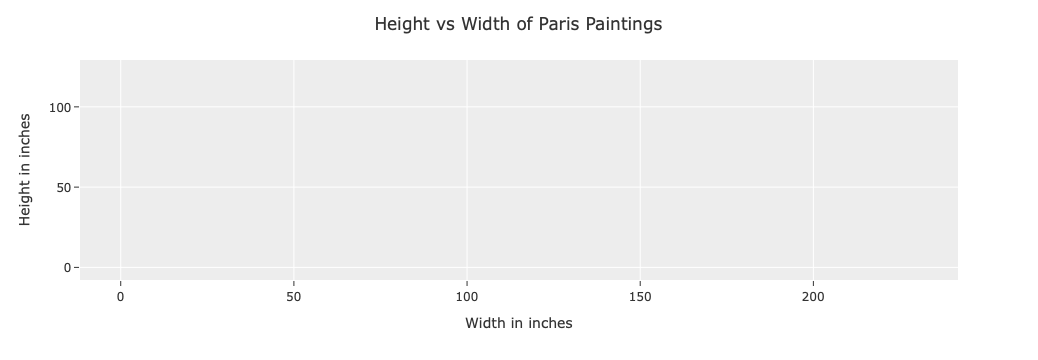

In [18]:
#Make a scatter plot width vs.height

fig = px.scatter(DF,x='Width_in',y="Height_in",color_discrete_sequence=['blue'])

fig.update_layout(template="ggplot2",
                  title='Height vs Width of Paris Paintings',
                  title_x=0.5,
                  xaxis_title="Width in inches",
                  yaxis_title="Height in inches")

fig.show()

The plot below uses Ordinary Least Squares fitting to find a reasonable line.

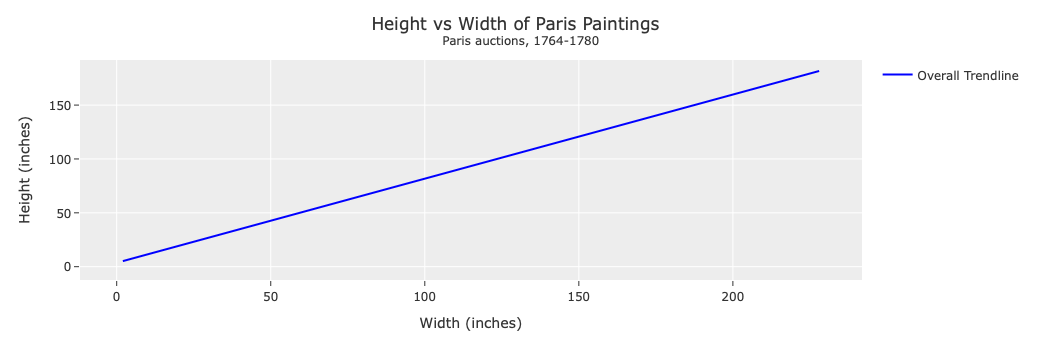

In [19]:
# Example Code Trendline

DF['Height_in'] = DF['Height_in'].apply(lambda x: float(x))
DF['Width_in'] = DF['Width_in'].apply(lambda x: float(x))

fig = px.scatter(DF,
                 x='Width_in',
                 y="Height_in",
                 color_discrete_sequence=['black'],
                trendline='ols',
                trendline_scope='overall',
                trendline_color_override='blue')


fig.update_layout(template="ggplot2",
                  title='Height vs Width of Paris Paintings <br><sup> Paris auctions, 1764-1780</sup>',
                  title_x=0.5,
                  xaxis_title="Width (inches)",
                  yaxis_title="Height (inches)")

fig.show()

So the line that "fits" this data based on the code we ran is

$$ H = 0.7808 W + 3.6214 $$

**Q4** Where do we think this prediction is most accurate? Where is there the most error? Explain why you think this?

QUESTION 4 ANSWER:

The prediction is most accurate through the middle of the graph. This is where the points are clustered but not super clustered to the point where we can't see the points individually. In this region, the points actually stay closer towards the line than any of the other spots on the scatter plot. The most error seems to occur at higher width regions. We can see that the points start to fall farther and farther from the line. The trendline isn't able to capture their height very well since they are all disbersed. This can cause for there to be way more area for an error. 

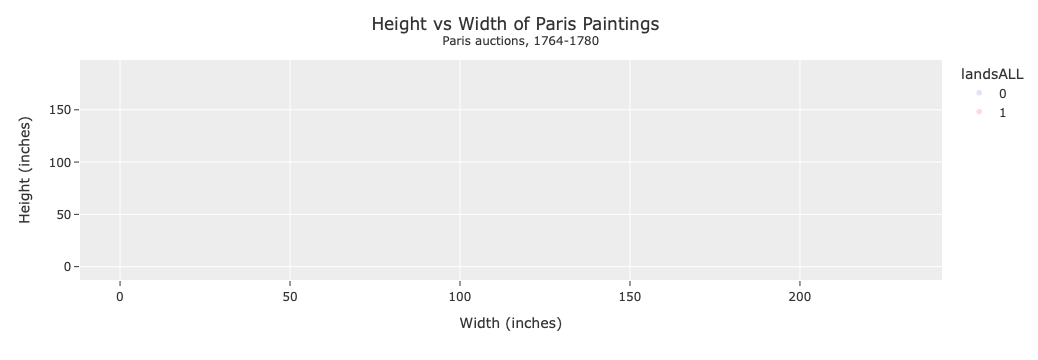

In [20]:
# Example Code Trendline with Categories
DF['landsALL'] = DF['landsALL'].apply(lambda x: str(x))

fig = px.scatter(DF,
                 x='Width_in',
                 y="Height_in",
                 color='landsALL',
                 opacity=0.2,
                 trendline='ols')

fig.update_layout(template="ggplot2",
                  title='Height vs Width of Paris Paintings <br><sup> Paris auctions, 1764-1780</sup>',
                  title_x=0.5,
                  xaxis_title="Width (inches)",
                  yaxis_title="Height (inches)")

fig.show()

IN the plot above we added another variable by coloring by whether or not there were landscape features in the painting. Then the trendline='ols' now gives us two lines. Here there is some evidence that if a painting in landscape, then it tends to be wider than it is tall.

**Exercise 1** Redo the plot above except color by some other variable that takes values of zero or one. Describe what the ols trendline tells you about the height and width of that type of painting. Eg. Does a painting being described as pastoral mean it is taller or wider than if it is not pastoral?

1. Choose a column that has just 0 and 1 as entries
2. Change those values into strings using apply and lambda
3. Do a value counts and talk about the balance in the data
4. Create a scatter plot with an old trendline colored by your focal column
5. Describe in words what you plot is telling you.

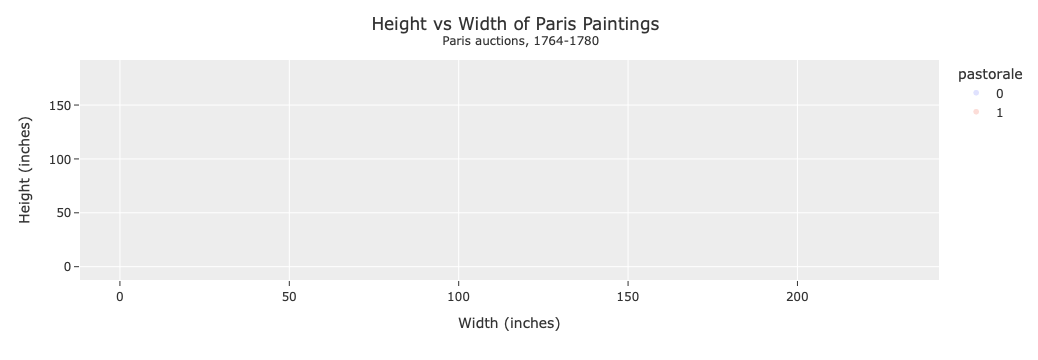

In [21]:
DF['pastorale'] = DF['pastorale'].apply(lambda x: str(x))

fig = px.scatter(DF,
                 x='Width_in',
                 y="Height_in",
                 color='pastorale',
                 opacity=0.2,
                 trendline='ols')

fig.update_layout(template="ggplot2",
                  title='Height vs Width of Paris Paintings <br><sup> Paris auctions, 1764-1780</sup>',
                  title_x=0.5,
                  xaxis_title="Width (inches)",
                  yaxis_title="Height (inches)")

fig.show()

In [22]:
#DO value counts for pastorale
DF['pastorale'].value_counts()

pastorale
0    3386
1       7
Name: count, dtype: int64

EXERCISE 1 RESPONSE:

In the value counts, the data set is telling us that it is very unbalanced. Mostof the paintings in the Pris auctions were not classified as pastorale only a few were. Because of this, the regression line for pastorale is based on very little observations and is less stable than the other paintings. 

For the plot, the trendlines show that the pastorale paintings tend to follow a similar height to width relationship as with the other paintings. Because the group I chose is much smaller, the line appears to be less stable but the plot does not change drastically even though the number of paintings is much less than the others. 



## Install Scikit-Learn

Run the code below to install sklearn.

```{python}
    !conda install -y scikit-learn
```

In [24]:
!conda install -y scikit-learn

Jupyter detected...
2 channel Terms of Service accepted
doneieving notices: - 
Channels:
 - conda-forge
 - defaults
Platform: osx-arm64
doneecting package metadata (repodata.json): / 
Solving edone


==> WARNING: A newer version of conda exists. <==
    current version: 25.7.0
    latest version: 25.9.1

Please update conda by running

    $ conda update -n base -c conda-forge conda



# All requested packages already installed.



In [25]:
# A new packages to import!
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import OneHotEncoder

**Exercise 2** Redo the Linear Regression from the lecture to see if you can use the size ('Surface') of the painting to predict the price.

1. Create a data frame with only the price and surface columns
2. Look at the data types
3. Preprocess the data - remove NaNs and change the Surface values to floats.
5. Train a linear regression model that takes as an input X = Surface Area and gives as an output y=price

           X = DF_model['Surface'].values.reshape(-1,1)
           y = DF_model['price'].values
7. Plot a scatter plot of Price vs Surface add in your predicted line
8. Find your slope and intercept
9. Look at the score

Interpret your results. Should you use a linear model to predict the price of a painting using the surface area?

*In the lecture you can see the scatter plot and score that I got.*


### Preprocessing the Data

Before you can build a model you need to do some cleaning and preprocessing of your data. Here are some important steps:

1. Select the variables that you wan to use (columns)
2. Decide what to do about NaNs or other strange data
3. (*advanced*) Think about rescaling and standardizing
4. Create the inputs and outputs (sometimes encode)
5. (*advanced*) Test - Train split

### Train the model

1. Create the base model, in this case LinearRegression()
2. Train the model using the training data
3. Look at the results.


In [26]:
DF_model = DF[['Height_in','Width_in']]
DF_model.dtypes

Height_in    float64
Width_in     float64
dtype: object

In [27]:
# Check out the NaNs

# How many Nans
print('Number of NaNs:')
print(DF_model.isna().sum().sum())
print('----------------------')

# What percent of the data is this?
print('Percent NaNs:')
print(DF_model.isna().sum().sum()/len(DF))
print('----------------------')

# I am going to drop these! This is a choice!
DF_model.dropna(inplace=True)
print('Number of NaNs after drop:')
print(DF_model.isna().sum().sum())
print('----------------------')

Number of NaNs:
508
----------------------
Percent NaNs:
0.14972001178897731
----------------------
Number of NaNs after drop:
0
----------------------


In [28]:
# Create the inputs X (explanatory variable) and the outputs y (response variable)
# .values just gets the numbers that we need
# .reshape(-1,1) puts the X data in the right shape.

X = DF_model['Width_in'].values.reshape(-1, 1)
y = DF_model['Height_in'].values

In [29]:
# Create linear regression object - a random straight line
LM = LinearRegression()

# Train the model using the data
LM.fit(X, y)

LinearRegression()

In [30]:
# The coefficient is the slope
LM.coef_

array([0.78079641])

In [31]:
# We can also see the intercept
LM.intercept_

np.float64(3.6214055418382074)

In [32]:
width = 33
width = np.array(width).reshape(-1,1)
LM.predict(width)

array([29.38768703])

In [33]:
width = 0
width = np.array(width).reshape(-1,1)
LM.predict(width)

array([3.62140554])

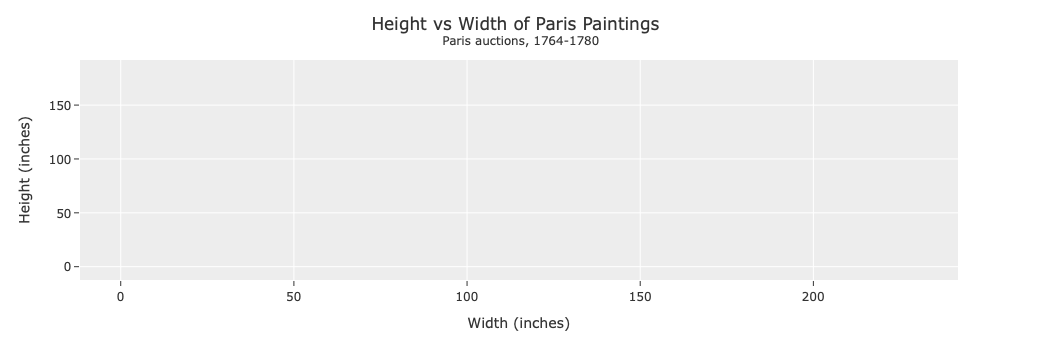

In [34]:
fig = px.scatter(DF,
                 x='Width_in',
                 y="Height_in",
                 color_discrete_sequence=['black'],
                 opacity=0.2)

fig.update_layout(template="ggplot2",
                  title='Height vs Width of Paris Paintings <br><sup> Paris auctions, 1764-1780</sup>',
                  title_x=0.5,
                  xaxis_title="Width (inches)",
                  yaxis_title="Height (inches)")

# Add the line our model would predict
DF_model = pd.DataFrame()
DF_model['w'] = DF['Width_in']
DF_model['y'] = LM.coef_*DF_model['w']+LM.intercept_
DF_model = DF_model.sort_values('w')

fig.add_trace(
    px.line(DF_model, x='w', y='y',color_discrete_sequence=['blue']).data[0]
)

fig.show()

In [35]:
LM.score(X, y)

0.6829467672722758

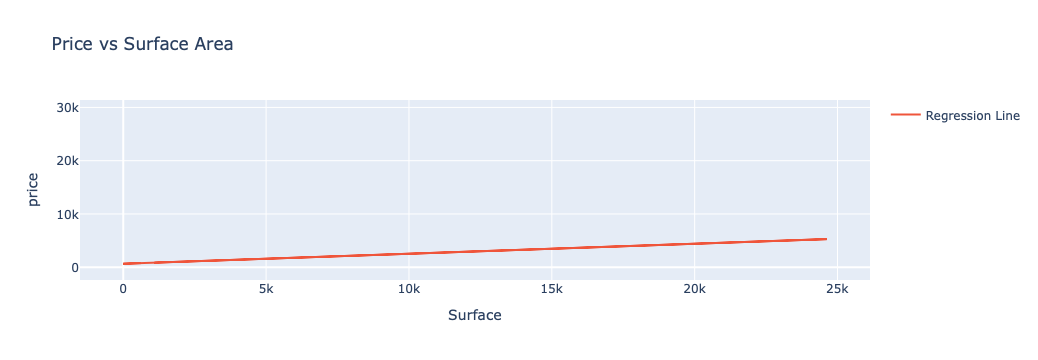

Slope: 0.18762629558739818
Intercept: 660.1215276728364


In [45]:
DF_model = DF_raw_paintings[['price', 'Surface']].copy()

DF_model.replace('', np.nan, inplace=True)       
DF_model.dropna(subset=['price', 'Surface'], inplace=True)

DF_model['Surface'] = DF_model['Surface'].astype(float)

X = DF_model['Surface'].values.reshape(-1, 1)
y = DF_model['price'].values

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

fig = px.scatter(
    DF_model,
    x='Surface',
    y='price',
    opacity=0.6,
    title="Price vs Surface Area"
)

fig.add_scatter(
    x=DF_model['Surface'],
    y=y_pred,
    mode='lines',
    name='Regression Line'
)

fig.show()


#need to print out slope and y intercept of my graph
print("Slope:", model.coef_[0])
print("Intercept:", model.intercept_)

**Exercise 3** Redo the analysis for Linear Regression with more than one categorical value (from the lecture) except this time see if the school of the painting effects the overall size ('Surface') of the painting. Don't forget to drop the NaNs where we don't know the surface size and change the surface variables to floats.

1. Create a data frame with only the school and surface columns
2. Look at the data types
3. Preprocess the data - remove NaNs and change the Surface values to floats.
5. Train a linear regression model that takes as an input X = School and gives as an output y= surface area, now you need to one hot encode the X values!

           X = DF_model['school_pntg'].values.reshape(-1,1)
           y = DF_model['Surface'].values
   
9. Look at the output, what does it mean?
        - Which school of paintings on average are largest? smallest?

*You can see the outputs of my code in the lecture*


INTERPRETATIONS FOR EXERCISE 2:

Based on the regression output, the slope and intercept score show how well surface area predicts price. The slope tells us how much the price changes for each additional unit of surface area, and the intercept represents the predicted price when the surface area is zero. The paintings with similar surface areas can still have very different prices. Price appears to be influenced by many other factors like as the artist, subject matter, year, style, and historical importance , not just size.

In [46]:
from sklearn.preprocessing import OneHotEncoder

In [47]:
my_columns = ['school_pntg','price']
DF_model = DF[my_columns]
DF_model

,school_pntg,price
0,F,360.0
1,I,6.0
2,D/FL,12.0
3,F,6.0
4,F,6.0
...,...,...
3388,F,18.0
3389,F,25.0
3390,F,80.0
3391,F,5.0


In [48]:
DF_model['school_pntg'].value_counts()

school_pntg
D/FL    1492
F       1386
I        428
X         69
G          9
S          7
A          2
Name: count, dtype: int64

In [49]:
# Get the data we want to predict
X = DF_model['school_pntg'].values.reshape(-1,1)
y = DF_model['price'].values

# Now because X has lots of categories, we need to encode it:
encoder = OneHotEncoder()
X = encoder.fit_transform(X)

In [50]:
# Create linear regression object - a random straight line
LM = LinearRegression()

# Train the model using the data
LM.fit(X, y)


# Look at the information we get
print(LM.coef_)
print('------------------------------')
print(LM.intercept_)

[-607.02266271  462.24133601 -265.17805829 -650.46710718 -304.23294418
 2045.54876584 -680.8893295 ]
------------------------------
715.0226605473845


In [74]:
DF_model=DF_raw_paintings[['school_pntg', 'Surface', 'price']].copy()

DF_model= DF_model.replace('', np.nan)
DF_model= DF_model.dropna(subset=['school_pntg', 'price', 'Surface'])
DF_model['Surface'] = DF_model['Surface'].astype(float)

print("Dtypes after cleaning:")
print(DF_model.dtypes)

X = DF_model[['school_pntg', 'price', 'Surface']]
y = DF_model['Surface'].values

encoder = OneHotEncoder()

X_encoded = encoder.fit_transform(X)

categories = encoder.categories_[0]
categories

print(LM.coef_)
print('------------------------------')
LM = LinearRegression()
LM.fit(X_encoded, y)



Dtypes after cleaning:
school_pntg     object
Surface        float64
price          float64
dtype: object


AttributeError: 'LinearRegression' object has no attribute 'coef_'

QUESTION 3 ANSWER:

I'm not entirely sure that I can see the regression line, errors keep popping up. 